In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target

In [2]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
X.shape, y.shape

((70000, 784), (70000,))

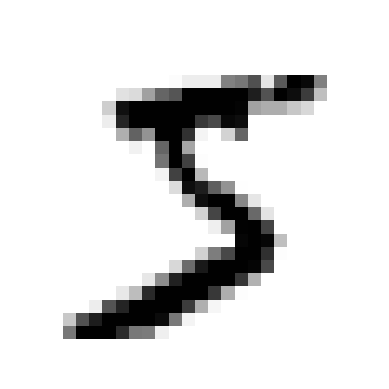

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

plot_digit(X[0])

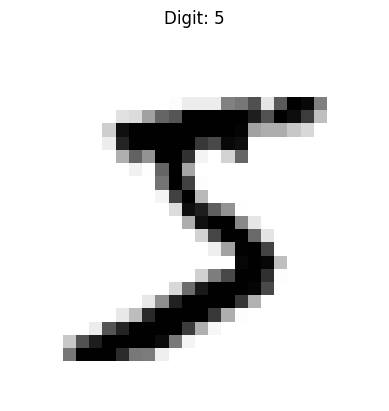

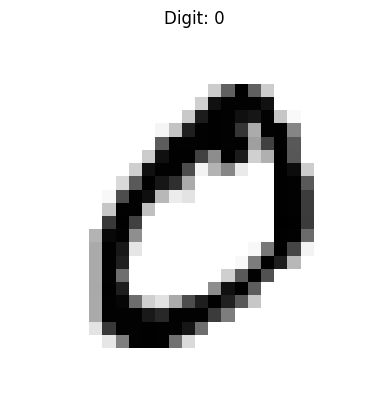

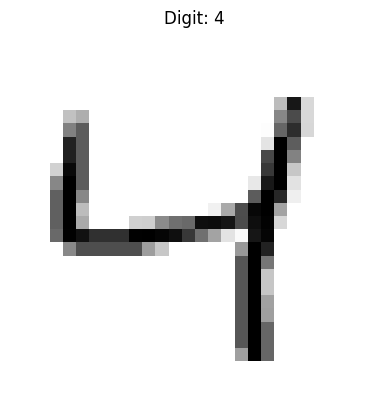

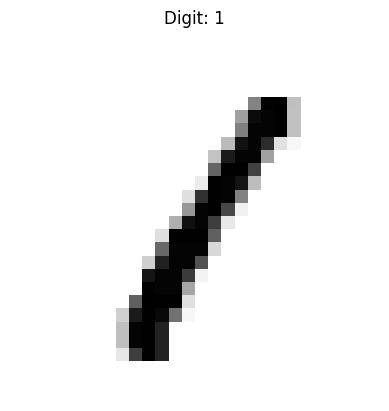

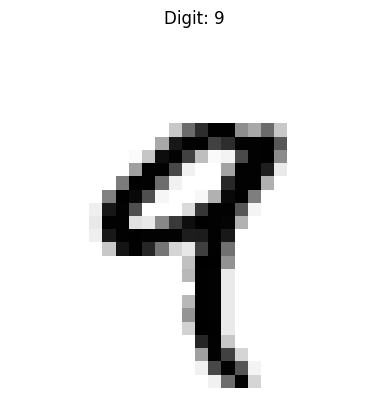

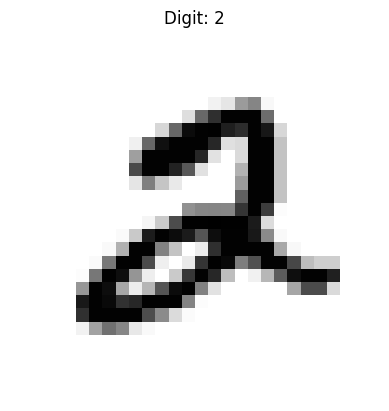

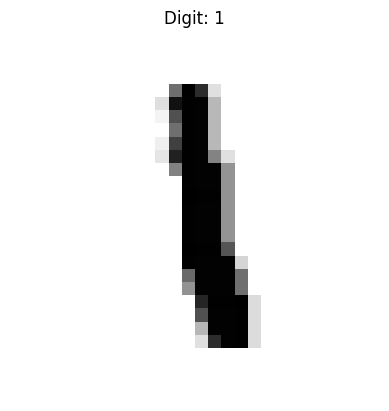

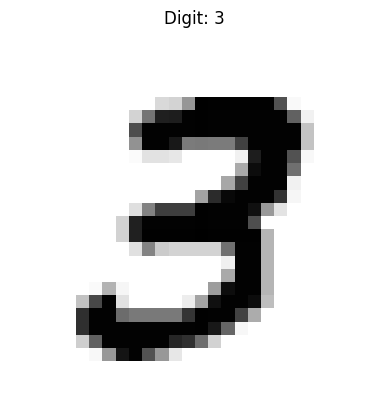

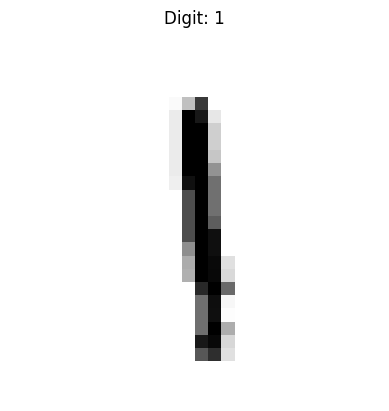

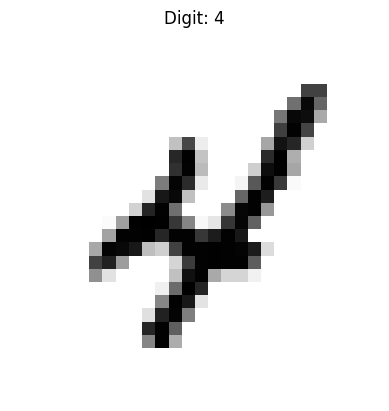

In [5]:
# Plot First 10 digits

for i in range(10):
    plt.title(f"Digit: {y[i]}")
    plot_digit(X[i])

plt.show()

Text(0, 0.5, 'Count')

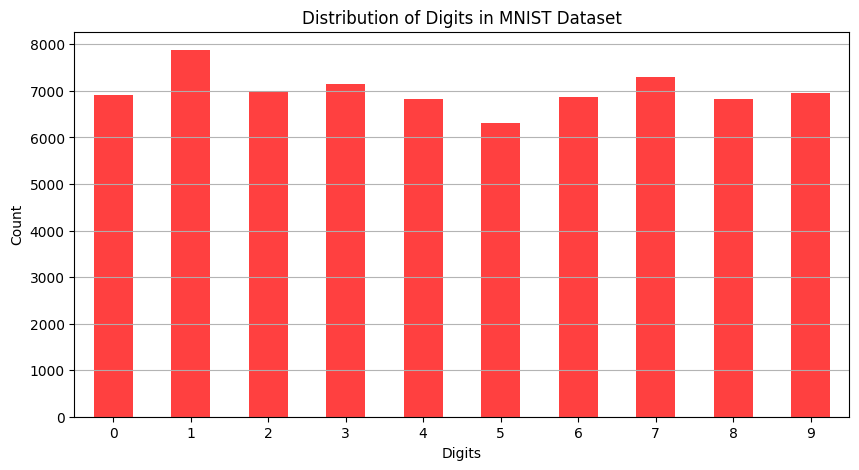

In [6]:
# checking the imbalance of the labels

pd.Series(y).value_counts().sort_index().plot(kind="bar", figsize=(10, 5), color="red", alpha=.75, zorder = 1)
plt.title("Distribution of Digits in MNIST Dataset")
plt.xticks(np.arange(10), np.arange(10))
plt.grid(axis="y", alpha=0.95, zorder = 2)
plt.xticks(rotation=0)
plt.xlabel("Digits")
plt.ylabel("Count")

As we can see that labels in the mnist dataset is imbalanced so we have use Stratified Shuffle for perserving the imbalance

In [7]:
# Split the dataset into training and test sets using train_test_split with stratification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

In [8]:
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Training set size: 60000
Test set size: 10000
Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


In [9]:
some_digit = X_train[0]

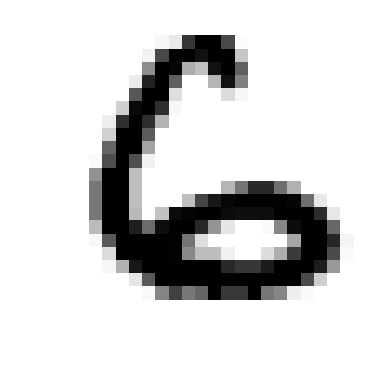

'6'

In [10]:
plot_digit(some_digit)
y_train[0]

In [12]:
# Using the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import sklearn
sklearn.set_config(display="diagram")

knn_clf = KNeighborsClassifier()

param_grid = {
    "n_neighbors": [3, 5, 7, 9, 10, 11],
    "weights": ["uniform", "distance"],
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=StratifiedKFold(n_splits=5), verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 10, 11],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [15]:
grid_search.best_score_

np.float64(0.9720666666666669)

In [16]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

best_model = grid_search.best_estimator_

cross_val_score(best_model, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring="accuracy")

array([0.9735    , 0.97458333, 0.97366667, 0.96958333, 0.969     ])

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(best_model, X_train, y_train, cv=StratifiedKFold(n_splits=3), verbose=3, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.9min finished


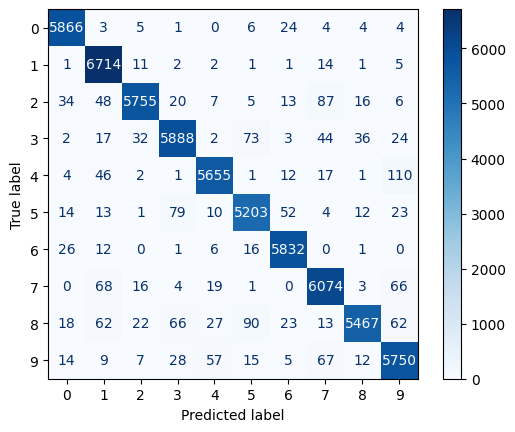

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, f1_score, precision_score, recall_score

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, cmap="Blues")

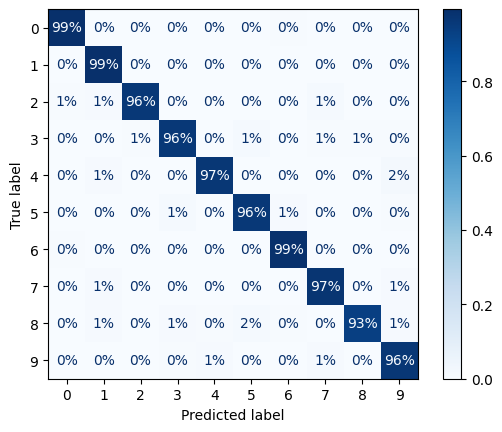

In [22]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", cmap="Blues", values_format=".0%")

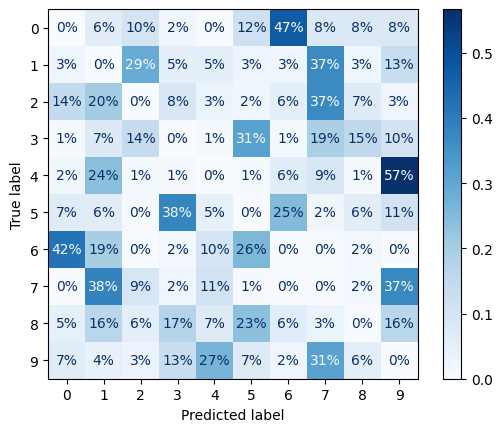

In [24]:
sample_weights = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weights, normalize="true", values_format=".0%", cmap="Blues")
plt.show()

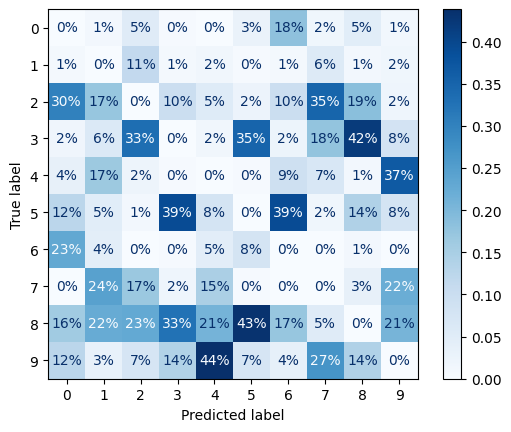

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weights, normalize="pred", values_format=".0%", cmap="Blues")
plt.show()

In [33]:
grid_search.score(X_test, y_test)

0.9751

In [36]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_neighbors" : randint(3, 12),
    "weights" : ["uniform", "distance"]
}

knn_rand = RandomizedSearchCV(knn_clf, param_distribs, cv=StratifiedKFold(n_splits=5), verbose=3, n_jobs=-1, n_iter=5)
knn_rand.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78f21af54610>,
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [37]:
knn_rand.best_score_

np.float64(0.9715333333333334)

In [38]:
knn_rand.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [40]:
knn_rand.best_estimator_.score(X_test, y_test)

0.9726